In [1]:
from Pysces import *

In [5]:
def V(x):
    return Operator(Function("V")(x))

p_x, m = symbols("p_x m")

def Hamiltonian_NEW(x):
    return Operator(((p_x**2)/(2*m)))


The Hamiltonian_NEW() function was created for simplicity for the following examples. However, it is equivalent to the original Hamiltonian() function.

# Example One 

We are asked to find: 

In [6]:
Derivative(Exp_Sym(x), x)

NameError: name 'Exp_Sym' is not defined

Given the operator:

In [7]:
Hamiltonian_NEW(x) + V(x)

Note that the first term is kinetic energy, and the second is potential energy.

The first step is similar to the earlier angular momentum example, and so the commutator has to be "distributed" into multiple commutators:

This uses the expand_COMM_1() function.

In [8]:
Comm_1 = (COMM(- Hamiltonian_NEW(x), V(x), x, 0))

display(Comm_1)

The 1/2m can be taken out, since it is a constant, and the second commutator is a known commutator that is equal to zero. 

This leads to:

In [10]:
(1/(2*m))*Commutator(Operator(x), Operator(p_x**2))

We have not yet defined how to handle operators that are squared. This process is defined below, and expands the commutator into multiple commutators:

In [11]:
def Comm_Sq(x, y):
    return Operator(y)*Commutator(Operator(x), Operator(y)) + Commutator(Operator(x), Operator(y))*Operator(y)

In [12]:
(1/(2*m))*Comm_Sq(x, p_x)

Note that the above is equivalent to adding them.

Next, the [p_x, x] commutators can be solved like the first operator example. Note that this is not the same as the first operator example, as the order is different.

In [21]:
EXPRESSION_REPLACE(COMM(Operator(x), P_OPERATOR(x), F(x)).doit(), x)

Let's reprint the Comm_Sq() function, and do a .replace() to replace the commutator with the solved commutator just done:

In [22]:
(Comm_Sq(x, p_x).replace(Commutator(Operator(p_x), Operator(x)), I*h_b))

It is important to recognize that the p_x term is NOT purely an operator, but an expectation value, which has a different notation. This notation can be defined as follows:

In [23]:
def Exp_Sym(x):
    return Operator("<" + str(x) + ">")


Finally, this can be replaced manually in the found expression above:

In [24]:
2*I*h_b*Exp_Sym(p_x)/(2*m)

# Example Two

This example involves the p_x operator instead of the x operator:

In [28]:
C = expand(COMM(- Hamiltonian_NEW(x), V(x), Operator(p_x), 0))

display(C)

Since in the first commutator, both terms have a p_x term, this commutator is equal to zero, leaving the second term.

In [30]:
-Commutator(Operator(p_x), V(x))

This can then be expanded using the COMM() funtion:

In [31]:
print(COMM(P_OPERATOR(x), V(x), F(x)))

-I*h_b*Derivative(1, x)*V(x)*F(x) - V(x)*-I*h_b*Derivative(1, x)*F(x)


Note that both V(x) and f(x) are functions, and the derivatives cannot be taken explicitly. This introduces a new function, Prod_Rule_Sp2().

This function is the symbolic representation of the product rule.

# Try to redefine EXPRESSION_REPLACE() to do this:

This function can then replace the Derivative() function in the first term, and in the second term, the Derivative(1, x) can be replaced with the Derivative(f(x), x)

In [197]:
print(expand(-I*h_b*Prod_Rule_Sp2(OP(V(x)), f(x), x) - V(x)*-I*h_b*Derivative(f(x), x)))

I*h_b*V(x)*Derivative(f(x), x) - I*h_b*f(x)*Derivative(V(x), x) - I*h_b*V(x)*Derivative(f(x), x)


The output of the above cell can be copied and pasted, and it will be simplified automatically:

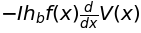

In [200]:
I*h_b*V(x)*Derivative(f(x), x) - I*h_b*f(x)*Derivative(V(x), x) - I*h_b*V(x)*Derivative(f(x), x)

It is important to note that the f(x) is an auxiliary function.